# Sujet 6 : Convergences

## Représentations graphiques

1. Écrire une fonction qui génère sur un même graphique les lois de Poisson pour diverses valeurs de $\lambda$. On prendra *k* compris entre 0 et 100. Cette fonction pourra prednre un ou plus paramètres.
2. Faire un fonction analogue pour une loi binomiale. On prendra comme valeurs par défaut n=50 et p=0.1.
3. De même avec la loi normale.

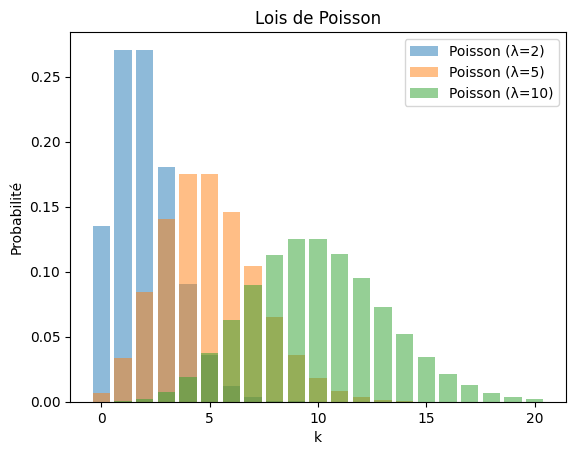

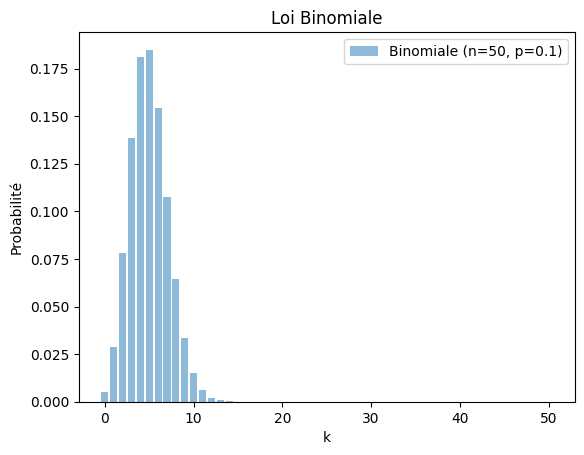

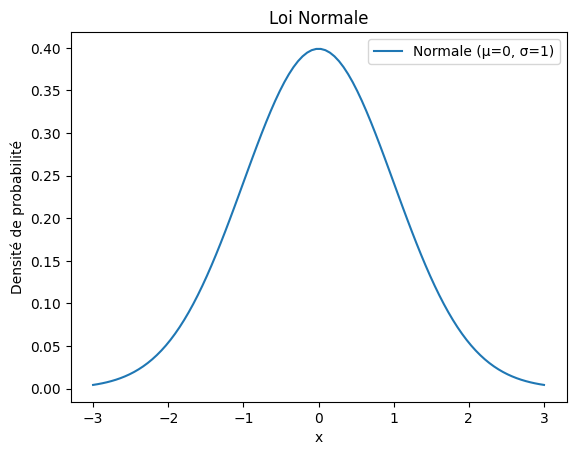

In [1]:
# Importation des modules nécessaires
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, poisson, binom

def graphiques_poisson(kmax = 100, *args) :
    """
    Retourne la représentation graphique en histogramme des lois de Poissons 
    pour k variant entre 0 et kmax (100 par défaut) et de paramètres données 
    en arguments (*args)
    """
    k_values = np.arange(kmax + 1)

    for parametre in args:
        poisson_values = poisson.pmf(k_values, parametre)
        plt.bar(k_values, poisson_values, alpha=0.5, label=f'Poisson (λ={parametre})')

    plt.title('Lois de Poisson')
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.show()

def graphiques_binomiale(n=50, p=0.1):
    """
    Retourne la représentation graphique en histogramme de la loi binomiale
    pour k variant entre 0 et n avec une probabilité de succès p.
    """
    k_values = np.arange(n + 1)

    binomial_values = binom.pmf(k_values, n, p)
    plt.bar(k_values, binomial_values, alpha=0.5, label=f'Binomiale (n={n}, p={p})')

    plt.title('Loi Binomiale')
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.show()

def graphiques_normale(mu=0, sigma=1):
    """
    Retourne la représentation graphique en histogramme de la loi normale
    pour une moyenne mu et un écart-type sigma.
    """
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    normal_values = norm.pdf(x, mu, sigma)
    plt.plot(x, normal_values, label=f'Normale (μ={mu}, σ={sigma})')

    plt.title('Loi Normale')
    plt.xlabel('x')
    plt.ylabel('Densité de probabilité')
    plt.legend()
    plt.show()

# Exemples d'utilisation
graphiques_poisson(20, 2, 5, 10)
graphiques_binomiale(50, 0.1)
graphiques_normale(0, 1)

## Convergence d’une loi binomiale vers une loi de Poisson
Représenter, sur un même grahique, la loi de Poisson et la loi binomiale.

Par essais/erreurs, trouver les valeurs de 𝑛 et 𝑝 qui approchent "au mieux" la loi de Poisson et dégagez une condition générale reliant 𝑛, 𝑝 et 𝜆.

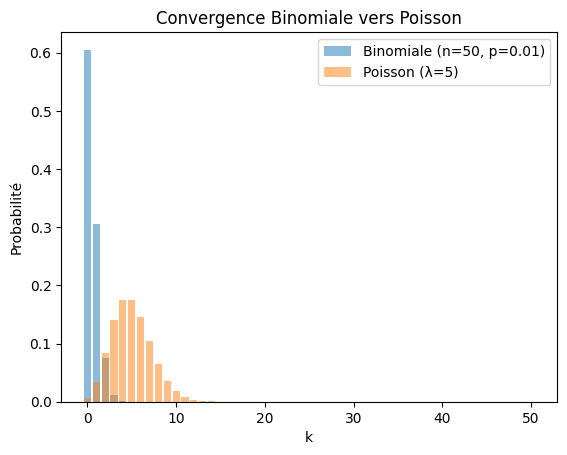

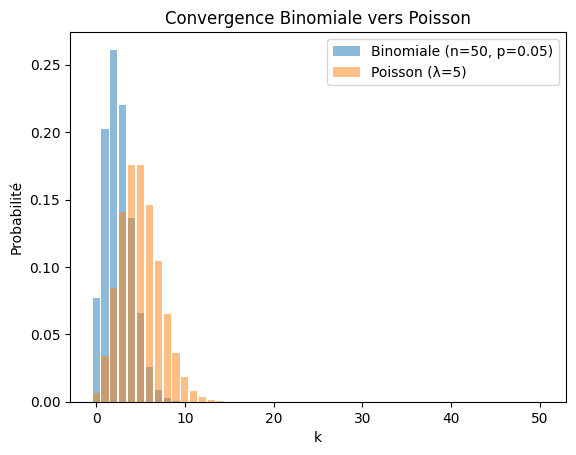

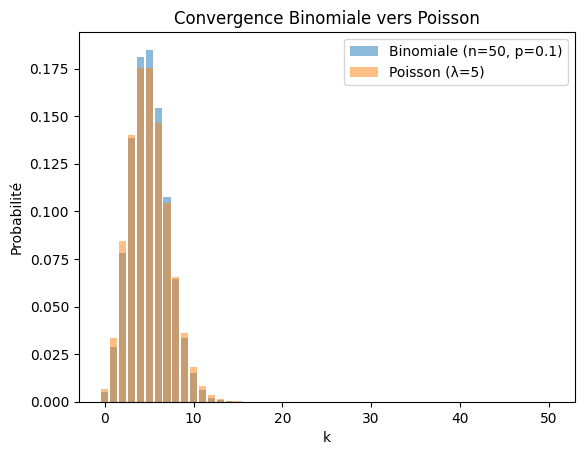

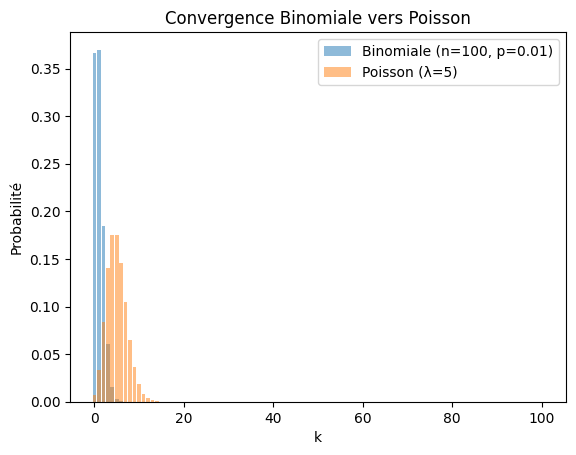

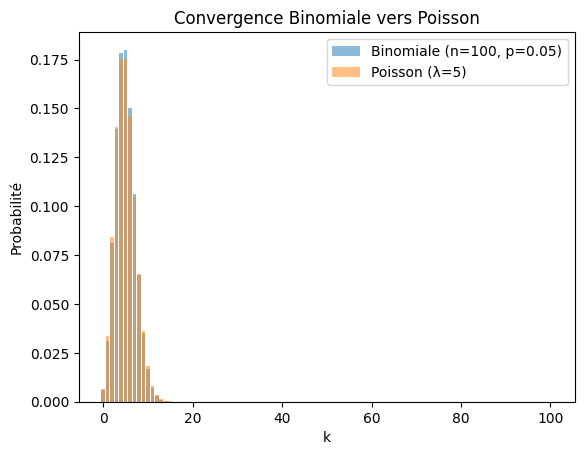

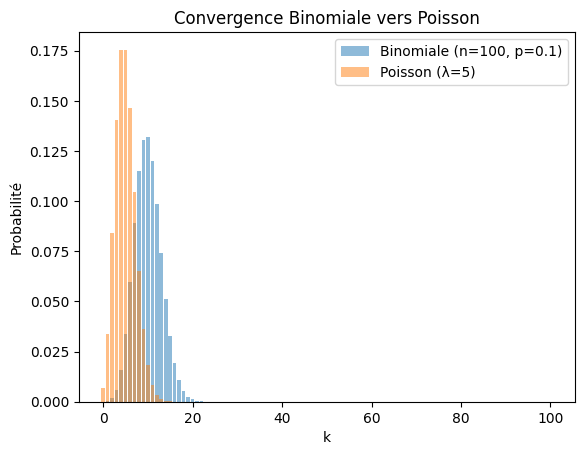

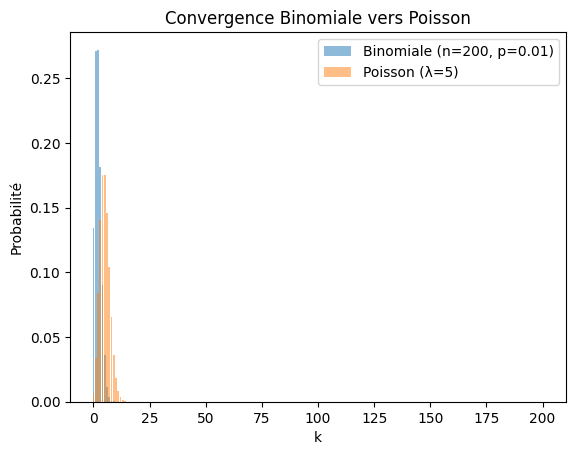

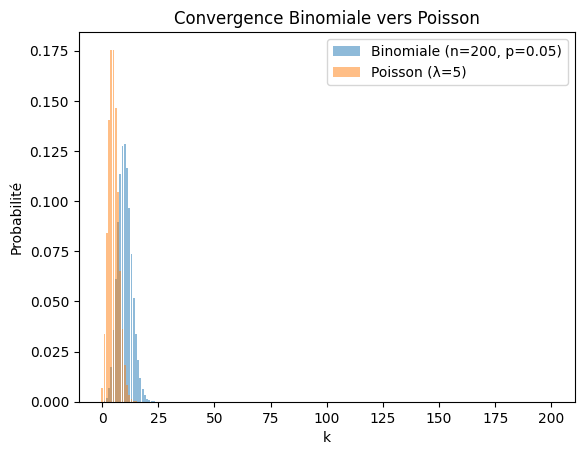

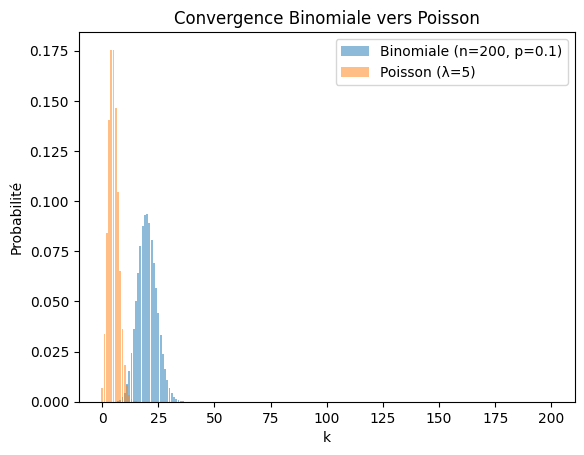

In [4]:
def graphiques_binomiale_poisson(n, p, lambda_value):
    """
    Représente graphiquement la convergence d'une loi binomiale vers une loi de Poisson.
    """
    k_values = np.arange(n + 1)

    # Loi binomiale
    binomial_values = binom.pmf(k_values, n, p)
    plt.bar(k_values, binomial_values, alpha=0.5, label=f'Binomiale (n={n}, p={p})')

    # Loi de Poisson
    poisson_values = poisson.pmf(k_values, lambda_value)
    plt.bar(k_values, poisson_values, alpha=0.5, label=f'Poisson (λ={lambda_value})')

    plt.title('Convergence Binomiale vers Poisson')
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.show()

# Essais/erreurs pour trouver les valeurs de n et p
n_values = [50, 100, 200]
p_values = [0.01, 0.05, 0.1]

lambda_value = 5  # Valeur de lambda pour la loi de Poisson

for n in n_values:
    for p in p_values:
        graphiques_binomiale_poisson(n, p, lambda_value)

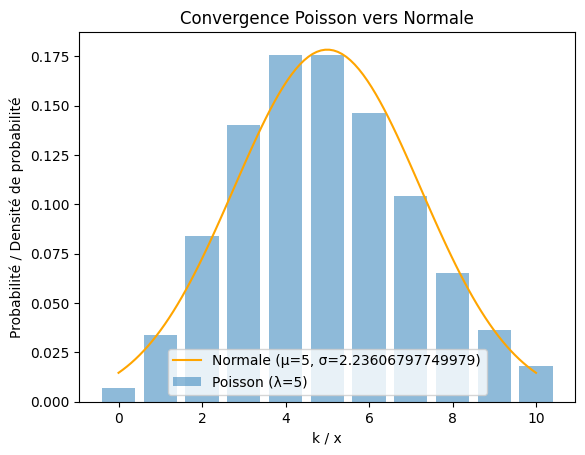

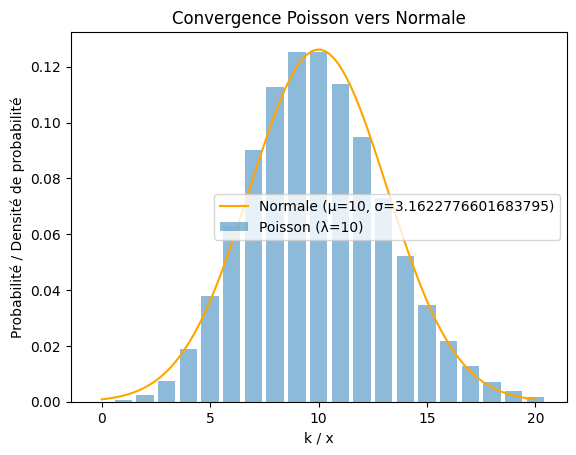

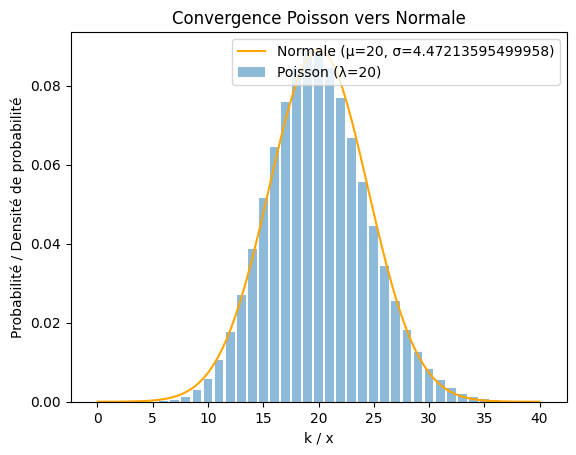

In [5]:
def graphiques_poisson_normale(lambda_value):
    """
    Représente graphiquement la convergence d'une loi de Poisson vers une loi normale.
    """
    k_values = np.arange(0, 2*lambda_value + 1)

    # Loi de Poisson
    poisson_values = poisson.pmf(k_values, lambda_value)
    plt.bar(k_values, poisson_values, alpha=0.5, label=f'Poisson (λ={lambda_value})')

    # Loi normale (approximation de la loi de Poisson pour λ grand)
    mu = lambda_value
    sigma = np.sqrt(lambda_value)
    x = np.linspace(0, 2*lambda_value, 100)
    normal_values = norm.pdf(x, mu, sigma)
    plt.plot(x, normal_values, label=f'Normale (μ={mu}, σ={sigma})', color='orange')

    plt.title('Convergence Poisson vers Normale')
    plt.xlabel('k / x')
    plt.ylabel('Probabilité / Densité de probabilité')
    plt.legend()
    plt.show()

# Essais/erreurs pour trouver les valeurs de λ
lambda_values = [5, 10, 20]

for lambda_value in lambda_values:
    graphiques_poisson_normale(lambda_value)

Théorème de la limite centrée
On admet le théorème suivant :

Soit (𝑋𝑛)
 une suite de VAR de même loi, de même espérance 𝑚
 et de même écrat-type 𝜎
Soit 𝑆𝑛=∑𝑛𝑖=1𝑋𝑛
 et sa VAR centrée réduite 𝑆∗𝑛=𝑆𝑛−𝑛𝑚𝜎𝑛√
Alors 𝑆∗𝑛
 converge en loi vers la loi normale centrée réduite.

Illustrer graphiquement ce théorème en utilisant diverses lois de probabilité. On pourra utiliser les lois disponibles dans scipy.stats.

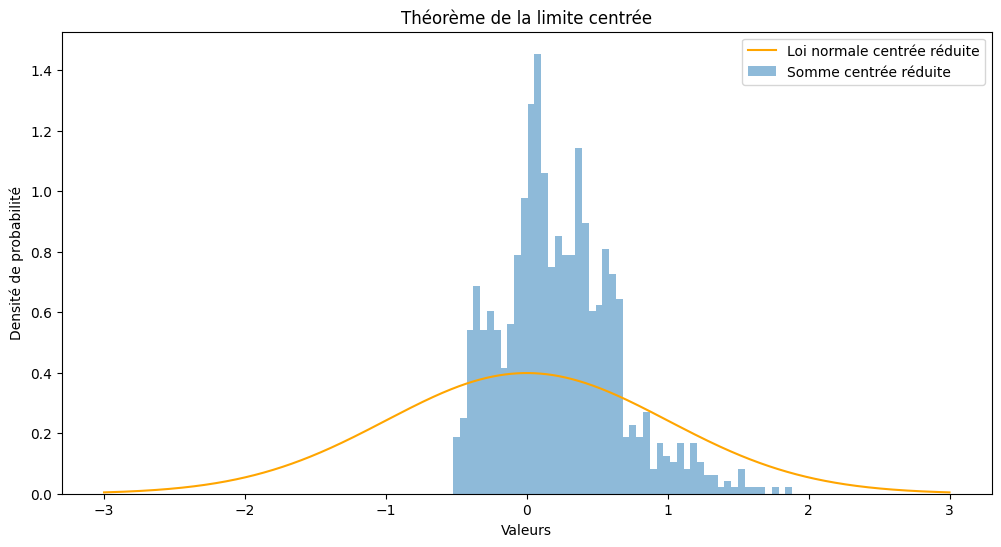

In [16]:
def convergence_limite_centree(suite_VAR, nb_variables=1000):
    """
    Illustrer graphiquement le Théorème de la limite centrée.
    
    Parameters:
        - suite_VAR: Une fonction qui génère une suite de variables aléatoires.
        - nb_variables: Le nombre de variables aléatoires dans la suite.
    """
    # Générer la suite de VAR
    Xn_values = suite_VAR(size=(nb_variables,))
    
    # Calculer la somme cumulée
    Sn_values = np.cumsum(Xn_values)
    
    # Calculer la somme centrée réduite
    m = np.mean(Xn_values)
    sigma = np.std(Xn_values)
    Sstar_n_values = (Sn_values - np.arange(1, nb_variables + 1) * m) / (np.sqrt(np.arange(1, nb_variables + 1)) * sigma)
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Distribution normale centrée réduite
    x = np.linspace(-3, 3, 1000)
    plt.plot(x, norm.pdf(x, 0, 1), label='Loi normale centrée réduite', color='orange')
    
    # Somme centrée réduite
    plt.hist(Sstar_n_values, bins=50, density=True, alpha=0.5, label='Somme centrée réduite')
    
    plt.title("Théorème de la limite centrée")
    plt.xlabel("Valeurs")
    plt.ylabel("Densité de probabilité")
    plt.legend()
    plt.show()

# Exemple d'utilisation avec une loi exponentielle
convergence_limite_centree(lambda size: np.random.exponential(scale=1, size=size))

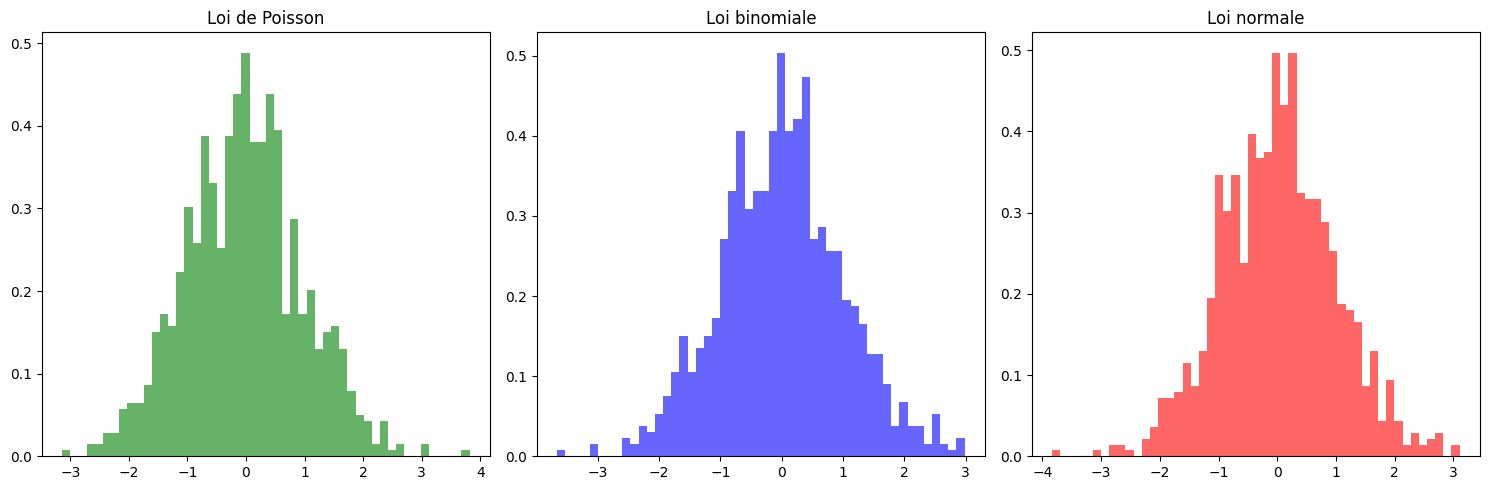

In [5]:
# Paramètres communs
n_samples = 1000
n_values = 1000

# Loi de Poisson
lambda_poisson = 5
poisson_samples = poisson.rvs(mu=lambda_poisson, size=(n_samples, n_values))
poisson_sums = np.sum(poisson_samples, axis=1)
poisson_centered = (poisson_sums - n_values * lambda_poisson) / np.sqrt(n_values * lambda_poisson)

# Loi binomiale
n_binomial = 20
p_binomial = 0.5
binomial_samples = binom.rvs(n=n_binomial, p=p_binomial, size=(n_samples, n_values))
binomial_sums = np.sum(binomial_samples, axis=1)
binomial_centered = (binomial_sums - n_values * n_binomial * p_binomial) / np.sqrt(n_values * n_binomial * p_binomial * (1 - p_binomial))

# Loi normale
mu_normal = 0
sigma_normal = 1
normal_samples = norm.rvs(loc=mu_normal, scale=sigma_normal, size=(n_samples, n_values))
normal_sums = np.sum(normal_samples, axis=1)
normal_centered = (normal_sums - n_values * mu_normal) / np.sqrt(n_values)  # La loi normale est déjà centrée et réduite

# Tracé des graphiques
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(poisson_centered, bins=50, density=True, alpha=0.6, color='g')
plt.title('Loi de Poisson')

plt.subplot(1, 3, 2)
plt.hist(binomial_centered, bins=50, density=True, alpha=0.6, color='b')
plt.title('Loi binomiale')

plt.subplot(1, 3, 3)
plt.hist(normal_centered, bins=50, density=True, alpha=0.6, color='r')
plt.title('Loi normale')

plt.tight_layout()
plt.show()

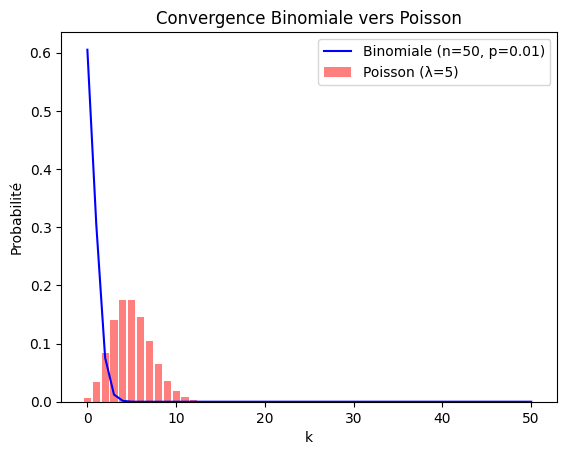

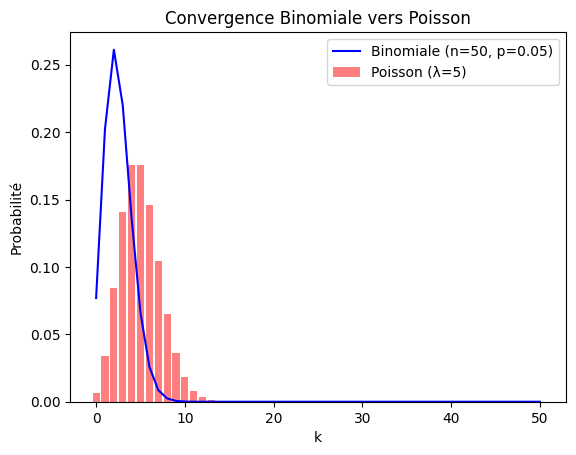

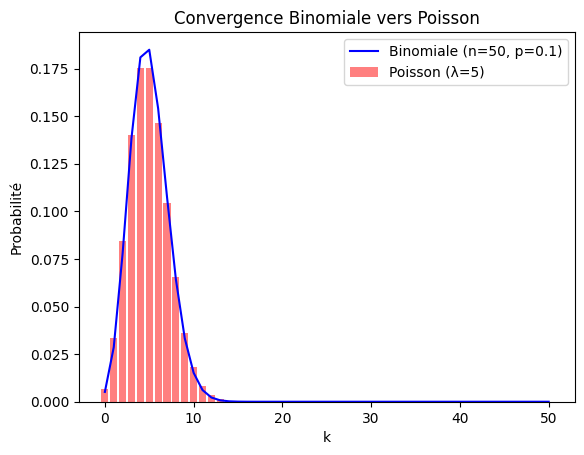

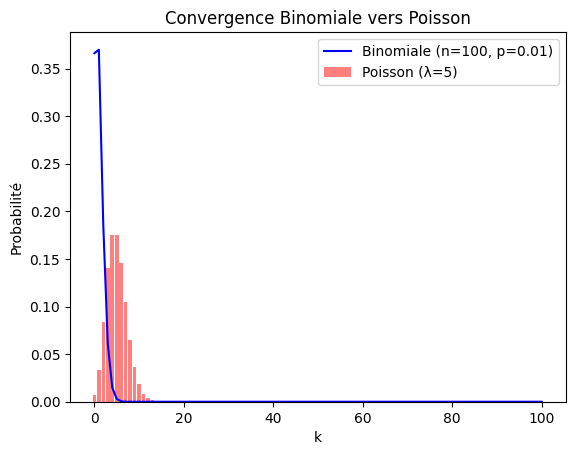

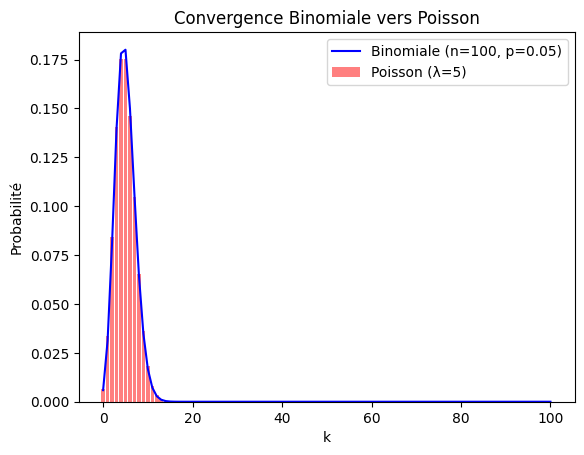

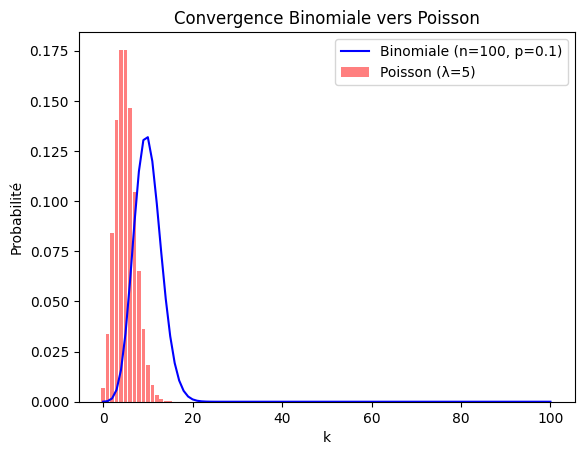

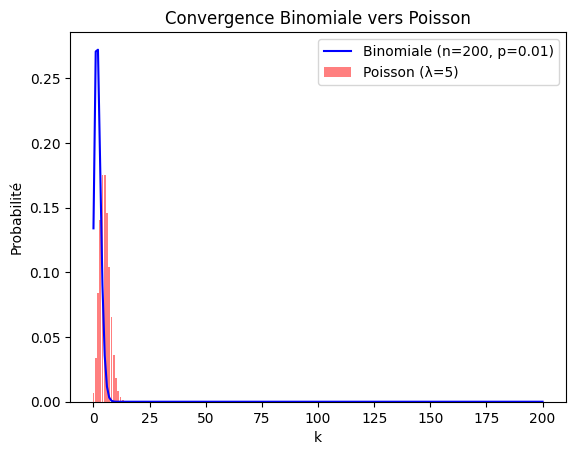

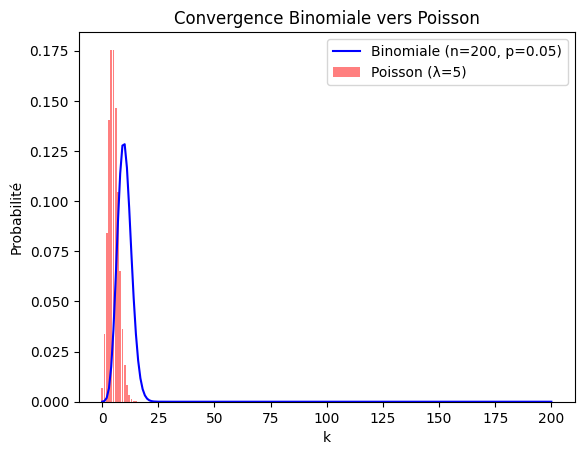

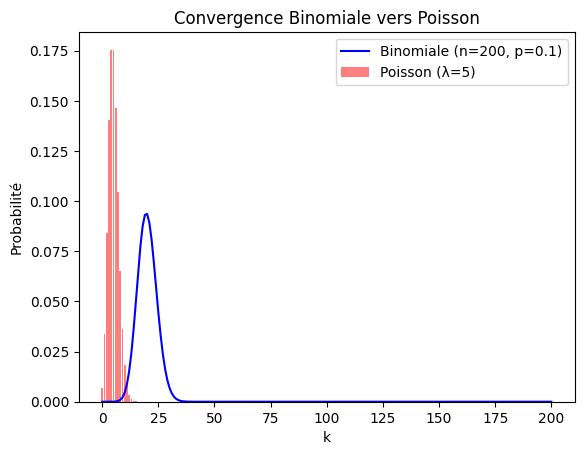

In [9]:
def graphiques_binomiale_poisson(n, p, lambda_value):
    """
    Représente graphiquement la convergence d'une loi binomiale vers une loi de Poisson.
    """
    k_values = np.arange(n + 1)

    # Loi binomiale (représentation continue)
    binomial_values = binom.pmf(k_values, n, p)
    plt.plot(k_values, binomial_values, '-', label=f'Binomiale (n={n}, p={p})', color='b')

    # Loi de Poisson
    poisson_values = poisson.pmf(k_values, lambda_value)
    plt.bar(k_values, poisson_values, alpha=0.5, label=f'Poisson (λ={lambda_value})', color='r')

    plt.title('Convergence Binomiale vers Poisson')
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.show()

# Essais/erreurs pour trouver les valeurs de n et p
n_values = [50, 100, 200]
p_values = [0.01, 0.05, 0.1]

lambda_value = 5  # Valeur de lambda pour la loi de Poisson

for n in n_values:
    for p in p_values:
        graphiques_binomiale_poisson(n, p, lambda_value)

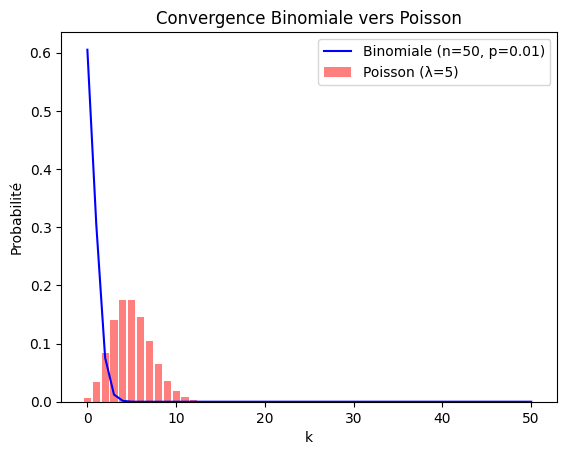

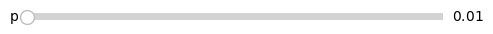

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from scipy.stats import binom, poisson

def graphiques_binomiale_poisson(n, p, lambda_value):
    """
    Représente graphiquement la convergence d'une loi binomiale vers une loi de Poisson.
    """
    k_values = np.arange(n + 1)

    # Loi binomiale (représentation continue)
    binomial_values = binom.pmf(k_values, n, p)
    plt.plot(k_values, binomial_values, '-', label=f'Binomiale (n={n}, p={p:.2f})', color='b')

    # Loi de Poisson
    poisson_values = poisson.pmf(k_values, lambda_value)
    plt.bar(k_values, poisson_values, alpha=0.5, label=f'Poisson (λ={lambda_value})', color='r')

    plt.title('Convergence Binomiale vers Poisson')
    plt.xlabel('k')
    plt.ylabel('Probabilité')
    plt.legend()
    plt.show()

# Fonction de mise à jour du graphique en fonction de la valeur du curseur
def update(val):
    p_value = slider.val
    plt.clf()  # Efface le graphique précédent
    graphiques_binomiale_poisson(n_value, p_value, lambda_value)

# Initialisation des paramètres
n_values = [50, 100, 200]
p_values = [0.01, 0.05, 0.1]
lambda_value = 5  # Valeur de lambda pour la loi de Poisson

# Paramètres initiaux
n_value = n_values[0]
p_initial = p_values[0]

# Création du graphique initial
graphiques_binomiale_poisson(n_value, p_initial, lambda_value)

# Ajout du curseur pour la valeur de p
ax_slider = plt.axes([0.2, 0.01, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'p', 0.01, 0.1, valinit=p_initial)
slider.on_changed(update)

plt.show()
